In [1]:
import swan_vis as swan
import pandas as pd
import met_brewer
import seaborn as sns

In [14]:
swan_files = ['/Users/fairliereese/mortazavi_lab/bin/modelad_pipeline/ad005/test.p']

# keep track of metadatas
obs = pd.DataFrame()
for s in swan_files:
    sg = swan.read(s)
    obs = pd.concat([obs, sg.adata.obs], axis=0)

Read in graph from /Users/fairliereese/mortazavi_lab/bin/modelad_pipeline/ad005/test.p


In [15]:
# get unique genotypes, timepoints, tissues, etc
genotypes = obs.genotype.unique()
sex = obs.sex.unique()
ages = obs.age.unique()
tissues = obs.tissue.unique()

In [16]:
print(genotypes)
print(sex)
print(ages)
print(tissues)

['5xBIN1_HO' 'BIN1_HO' '5xCLU-h2kbKI_HO' '5xFADHEMI' 'CLU-h2kbKI_HO'
 '5xFADWT']
['F']
['4_months']
['HC']


{0: '#2b9b81', 1: '#fe9b00', 2: '#f4c40f', 3: '#fbe183', 4: '#633372', 5: '#9b3441', 6: '#e6a2a6', 7: '#92c051', 8: '#1f6e9c', 9: '#9f5691', 10: '#e87b89'}


<AxesSubplot:xlabel='num'>

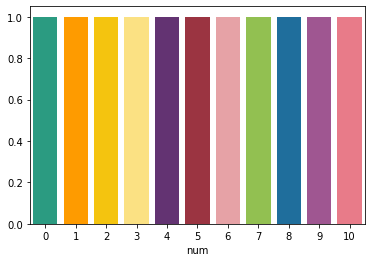

In [17]:
df = pd.DataFrame()
df['color'] = met_brewer.met_brew("Signac", n=11, brew_type="discrete")
df['num'] = df.index.tolist()
cmap = dict([(num, color) for num, color in zip(df.num.tolist(), df.color.tolist())])
print(cmap)
sns.barplot(df, y=[1 for i in range(len(df.index))], x='num', palette=cmap, saturation=1)

In [18]:
g_cmap = {'5xFADHEMI': cmap[1],
          '5xFADWT': cmap[2],
          'CLU-h2kbKI_HO': cmap[0],
          '5xCLU-h2kbKI_HO': cmap[8],
          '5xBIN1_HO': cmap[4],
          'BIN1_HO': cmap[5]}
s_cmap = {'M': cmap[3],
          'F': cmap[7]}
t_cmap = {'CTX': cmap[9],
          'HC': cmap[10]}          

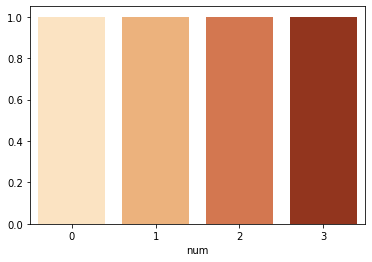

In [19]:
df = pd.DataFrame()
df['color'] = met_brewer.met_brew("OKeeffe2", n=4, brew_type="continuous")
df['num'] = df.index.tolist()
cmap = dict([(num, color) for num, color in zip(df.num.tolist(), df.color.tolist())])
sns.barplot(df, y=[1 for i in range(len(df.index))], x='num', palette=cmap, saturation=1)
order = ['8_weeks', 
         '10_weeks',
         '4_months',
         '18_months']
a_cmap = dict()
for i,t in enumerate(order):
    a_cmap[t] = cmap[i]

In [20]:
# swan_file = '/Users/fairliereese/mortazavi_lab/bin/modelad_pipeline/data/230516/swan/ad002/swan.p'
# sg = swan.read(swan_file)

In [21]:
sg.set_metadata_colors('genotype', g_cmap)
sg.set_metadata_colors('tissue', t_cmap)
sg.set_metadata_colors('sex', s_cmap)
sg.set_metadata_colors('age', a_cmap)

In [23]:
sg.save_graph('swan')

Saving graph as swan.p


In [22]:
sg.adata.obs.head()

,dataset,total_counts,batch,sample,mouse_id,genotype,sex,study,age,tissue,biorep_num,platform,talon_run_num
index,,,,,,,,,,,,,
5xBIN1_HO_F_4_months_HC_2,5xBIN1_HO_F_4_months_HC_2,2063701.0,0,5xBIN1_HO_F_4_months_HC,13022,5xBIN1_HO,F,ad005,4_months,HC,2,ONT,1
5xBIN1_HO_F_4_months_HC_1,5xBIN1_HO_F_4_months_HC_1,1615349.0,0,5xBIN1_HO_F_4_months_HC,13019,5xBIN1_HO,F,ad005,4_months,HC,1,ONT,1
BIN1_HO_F_4_months_HC_2,BIN1_HO_F_4_months_HC_2,3957167.0,0,BIN1_HO_F_4_months_HC,13047,BIN1_HO,F,ad005,4_months,HC,2,ONT,1
5xBIN1_HO_F_4_months_HC_3,5xBIN1_HO_F_4_months_HC_3,3269263.0,0,5xBIN1_HO_F_4_months_HC,13053,5xBIN1_HO,F,ad005,4_months,HC,3,ONT,1
BIN1_HO_F_4_months_HC_3,BIN1_HO_F_4_months_HC_3,5867917.0,0,BIN1_HO_F_4_months_HC,13051,BIN1_HO,F,ad005,4_months,HC,3,ONT,2


In [11]:
print(sg.adata.obs.sex.unique())
print(sg.adata.obs.age.unique())
print(sg.adata.obs.tissue.unique())
print(sg.adata.obs.genotype.unique())

['F']
Categories (1, object): ['F']
['4_months']
Categories (1, object): ['4_months']
['HC']
Categories (1, object): ['HC']
['5xBIN1_HO', 'BIN1_HO', '5xCLU-h2kbKI_HO', '5xFADHEMI', 'CLU-h2kbKI_HO', '5xFADWT']
Categories (6, object): ['5xBIN1_HO', '5xCLU-h2kbKI_HO', '5xFADHEMI', '5xFADWT', 'BIN1_HO', 'CLU-h2kbKI_HO']


In [12]:
['5xBIN1_HO', '5xFADHEMI', '5xFADWT', 'BIN1_HO']
genotype_pairs = [['5xBIN1_HO', '5xFADHEMI'], ['BIN1_HO', '5xFADWT']]

In [13]:
# genotype_pairs = [['5xBIN1_HO', '5xFADHEMI'], ['BIN1_HO', '5xFADWT']]
# for gs in genotype_pairs:
#     g1 = gs[0]
#     g2 = gs[1]
    
#     print(f'Genotypes {g1}, {g2}')
    
#     ofile = f'{g1}_{g2}_die.tsv'

#     die, genes = sg.die_gene_test(obs_col='genotype',
#                                   obs_conditions=[g1, g2],
#                                   verbose=True)
#     die.to_csv(ofile, sep='\t')

In [22]:
df = pd.read_csv('5xBIN1_HO_5xFADHEMI_die.tsv', sep='\t')

In [23]:
# filter for things that are actually die
df = df.loc[(df.dpi >= 10)&(df.adj_p_val<=0.05)]

In [27]:
df.sort_values(by='dpi', ascending=False).head(20)

,Unnamed: 0,gid,p_val,dpi,pos_iso_1,pos_iso_2,pos_iso_1_dpi,pos_iso_2_dpi,neg_iso_1,neg_iso_2,neg_iso_1_dpi,neg_iso_2_dpi,adj_p_val,gname
11751,11751,ENSMUSG00000115591,7.768951e-22,100.000004,"ENSMUSG00000115591[2,5,4]","ENSMUSG00000115591[2,3,3]",55.555557,44.444447,"ENSMUSG00000115591[4,5,1]","ENSMUSG00000115591[2,3,1]",-41.489365,-24.468084,1.320610e-20,Gm31282
867,867,ENSMUSG00000009614,5.043477e-07,100.000003,"ENSMUSG00000009614[1,12,1]",NaN,100.000000,NaN,"ENSMUSG00000009614[8,12,1]","ENSMUSG00000009614[2,2,2]",-93.333336,-6.666667,3.030968e-06,Sardh
11306,11306,ENSMUSG00000091472,6.144212e-06,100.000002,"ENSMUSG00000091472[1,2,2]",NaN,100.000000,NaN,"ENSMUSG00000091472[1,2,1]","ENSMUSG00000091472[1,3,1]",-85.714287,-14.285715,3.152817e-05,Gm3739
74,74,ENSMUSG00000000739,1.034787e-08,100.000002,"ENSMUSG00000000739[1,1,1]","ENSMUSG00000000739[1,2,5]",77.777779,22.222223,"ENSMUSG00000000739[1,1,2]","ENSMUSG00000000739[1,7,2]",-48.000000,-48.000000,7.582228e-08,Sult5a1
11777,11777,ENSMUSG00000117234,2.644237e-28,100.000001,"ENSMUSG00000117234[3,3,2]",NaN,100.000000,NaN,"ENSMUSG00000117234[2,3,2]","ENSMUSG00000117234[1,1,1]",-96.385544,-3.614458,6.140564e-27,AC154707.1
10582,10582,ENSMUSG00000069670,4.780893e-25,100.000001,"ENSMUSG00000069670[1,2,5]","ENSMUSG00000069670[1,6,6]",97.777779,2.222222,"ENSMUSG00000069670[5,2,7]",NaN,-100.000000,NaN,9.690755e-24,Nkain2
11158,11158,ENSMUSG00000085739,1.125352e-07,100.000000,"ENSMUSG00000085739[1,2,3]",NaN,100.000000,NaN,"ENSMUSG00000085739[1,2,2]","ENSMUSG00000085739[1,1,1]",-90.476189,-9.523809,7.342796e-07,Gm15862
8227,8227,ENSMUSG00000042015,1.028396e-85,100.000000,"ENSMUSG00000042015[1,12,9]",NaN,100.000000,NaN,"ENSMUSG00000042015[1,12,1]","ENSMUSG00000042015[1,12,6]",-85.375496,-7.509881,7.981573e-84,Wdr41
11382,11382,ENSMUSG00000095562,9.362758e-170,100.000000,"ENSMUSG00000095562[5,11,1]","ENSMUSG00000095562[5,6,2]",62.686569,37.313431,"ENSMUSG00000095562[4,11,1]","ENSMUSG00000095562[4,6,1]",-65.940056,-29.564032,1.555668e-167,Gm21887
11575,11575,ENSMUSG00000102618,2.272113e-09,100.000000,"ENSMUSG00000102618[1,1,1]",NaN,100.000000,NaN,"ENSMUSG00000102618[1,1,2]",NaN,-100.000000,NaN,1.769249e-08,Gm37848


In [28]:
len(df.index)

3504

In [29]:
df = pd.read_csv('BIN1_HO_5xFADWT_die.tsv', sep='\t')

In [30]:
# filter for things that are actually die
df = df.loc[(df.dpi >= 10)&(df.adj_p_val<=0.05)]

In [31]:
len(df.index)

3996

In [12]:
g_cmap

{'5xFADHEMI': '#fe9b00',
 '5xFADWT': '#f4c40f',
 'CLU-h2kbKI_HO': '#2b9b81',
 '5xCLU-h2kbKI_HO': '#1f6e9c',
 '5xBIN1_HO': '#633372',
 'BIN1_HO': '#9b3441'}

In [13]:
def plot_report(sg, gene):
    study = sg.adata.obs.study.tolist()[0]
    sg.gen_report(g,
                  f'figures/{g}_{study}',
                  novelty=True,
                  cmap='viridis',
                  indicate_novel=True,
                  transcript_col='tname',
                  metadata_cols=['genotype', 'sex', 'tissue', 'age'],
                  datasets={'genotype': ['BIN1_HO', '5xBIN1_HO', '5xFADWT', '5xFADHEMI']})
    sg.gen_report(g,
                  f'figures/{g}_{study}',
                  novelty=True,
                  cmap='viridis',
                  transcript_col='tname',
                  display_numbers=True,
                  browser=True,
                  layer='pi',
                  metadata_cols=['genotype', 'sex', 'tissue', 'age'],
                  datasets={'genotype': ['BIN1_HO', '5xBIN1_HO', '5xFADWT', '5xFADHEMI']})

In [17]:
# genes = ['Gfap', 'App', 'Apoe', 'Bin1']
genes = ['Bin1']
for g in genes:
    plot_report(sg, g)


Plotting transcripts for ENSMUSG00000024381
Saving transcript path graph for ENSMUSG00000024381[1,9,1] as figures/Bin1_ad005_novel_ENSMUSG00000024381[1,9,1]_path.png
Saving transcript path graph for ENSMUSG00000024381[1,2,1] as figures/Bin1_ad005_novel_ENSMUSG00000024381[1,2,1]_path.png
Saving transcript path graph for ENSMUSG00000024381[1,4,1] as figures/Bin1_ad005_novel_ENSMUSG00000024381[1,4,1]_path.png
Saving transcript path graph for ENSMUSG00000024381[1,3,1] as figures/Bin1_ad005_novel_ENSMUSG00000024381[1,3,1]_path.png
Saving transcript path graph for ENSMUSG00000024381[1,12,1] as figures/Bin1_ad005_novel_ENSMUSG00000024381[1,12,1]_path.png
Saving transcript path graph for ENSMUSG00000024381[1,20,1] as figures/Bin1_ad005_novel_ENSMUSG00000024381[1,20,1]_path.png
Saving transcript path graph for ENSMUSG00000024381[1,16,1] as figures/Bin1_ad005_novel_ENSMUSG00000024381[1,16,1]_path.png
Saving transcript path graph for ENSMUSG00000024381[1,11,1] as figures/Bin1_ad005_novel_ENSMUSG

In [ ]:
genes = ['Gfap', 'App', 'Apoe', 'Bin1']
# for s in swan_files:
    # sg = swan.read(s)
# sg.set_metadata_colors('genotype', g_cmap)
# sg.set_metadata_colors('tissue', t_cmap)
# sg.set_metadata_colors('sex', s_cmap)
# sg.set_metadata_colors('age', a_cmap)
study = sg.adata.obs.study.tolist()[0]
for g in genes:
    sg.gen_report(g,
                  f'figures/{g}_{study}',
                  novelty=True,
                  cmap='viridis',
                  indicate_novel=True,
                  transcript_col='tname',
                  metadata_cols=['genotype', 'sex', 'tissue', 'age'],
                  datasets={'genotype': ['BIN1_HO', '5xBIN1_HO', '5xFADWT', '5xFADHEMI']})
    sg.gen_report(g,
                  f'figures/{g}_{study}',
                  novelty=True,
                  cmap='viridis',
                  transcript_col='tname',
                  display_numbers=True,
                  browser=True,
                  layer='pi',
                  metadata_cols=['genotype', 'sex', 'tissue', 'age'],
                  datasets={'genotype': ['BIN1_HO', '5xBIN1_HO', '5xFADWT', '5xFADHEMI']})


Plotting transcripts for ENSMUSG00000020932
Saving transcript path graph for ENSMUSG00000020932[1,1,1] as figures/Gfap_ad005_novel_ENSMUSG00000020932[1,1,1]_path.png
Saving transcript path graph for ENSMUSG00000020932[1,2,2] as figures/Gfap_ad005_novel_ENSMUSG00000020932[1,2,2]_path.png
Saving transcript path graph for ENSMUSG00000020932[1,1,4] as figures/Gfap_ad005_novel_ENSMUSG00000020932[1,1,4]_path.png
Saving transcript path graph for ENSMUSG00000020932[1,7,1] as figures/Gfap_ad005_novel_ENSMUSG00000020932[1,7,1]_path.png
Saving transcript path graph for ENSMUSG00000020932[1,8,1] as figures/Gfap_ad005_novel_ENSMUSG00000020932[1,8,1]_path.png
Saving transcript path graph for ENSMUSG00000020932[1,9,1] as figures/Gfap_ad005_novel_ENSMUSG00000020932[1,9,1]_path.png
Saving transcript path graph for ENSMUSG00000020932[1,15,2] as figures/Gfap_ad005_novel_ENSMUSG00000020932[1,15,2]_path.png
Saving transcript path graph for ENSMUSG00000020932[1,22,1] as figures/Gfap_ad005_novel_ENSMUSG0000